# Importing necessary libraries 

In [55]:
import yfinance as yf #to get stock data
import pandas as pd #to handle dataframes
import numpy as np #for math
import datetime as dt #to handle dates
import matplotlib.pyplot as plt #for plotting

import riskfolio as rp #riskfolio-Lib to optimize portfolios


# Getting the data

The pandas_datareader library provides a convenient method to fetch historical stock price data from Yahoo Finance

In [56]:
dt.datetime.strptime('2020-01-01', '%Y-%m-%d')

datetime.datetime(2020, 1, 1, 0, 0)

In [57]:
#function to get stock data
#start_date and end_date must be in the datetime format
def getData(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

We try to create initially a diversified portfolio of stocks of the SP500 from different sectors. So that we can aim to have a return-risk that can be adjustable. We will use the following stocks:
- **Technology**: AAPL
- **Healthcare**: JNJ
- **Consumer Discretionary**: AMZN
- **Financials**: JPM
- **Industrials**: BA
- **Consumer Staples**: WMT
- **Energy**: XOM
- **Utilities**: NEE
- **Real Estate**: AMT
- **Materials**: LIN
- **Communication Services**: GOOG

In [58]:
#Our portfolio
stock_list = ['AAPL', 'JNJ', 'AMZN', 'JPM', 'BA', 'WMT', 'XOM', 'NEE', 'AMT', 'LIN', 'GOOG']

In [59]:
start_date = dt.datetime.strptime('2022-01-01', '%Y-%m-%d')
end_date = dt.datetime.strptime('2022-12-31', '%Y-%m-%d')

#Get the data
stock_data = getData(stock_list, start_date, end_date)

#only keep the adjusted close price column
stock_data = stock_data['Adj Close']

[*********************100%%**********************]  11 of 11 completed


In [60]:
#Calculate the daily returns
stock_returns = stock_data.pct_change()
#drop the first row which is NaN
stock_returns = stock_returns[1:]

In [61]:
stock_returns

,AAPL,AMT,AMZN,BA,GOOG,JNJ,JPM,LIN,NEE,WMT,XOM
Date,,,,,,,,,,,
2022-01-04,-0.012692,-0.012606,-0.016916,0.027759,-0.004536,-0.002682,0.037910,0.018220,-0.010692,-0.018320,0.037614
2022-01-05,-0.026600,-0.064363,-0.018893,-0.002621,-0.046830,0.006664,-0.018282,0.004640,-0.010476,0.013521,0.012437
2022-01-06,-0.016693,0.001210,-0.006711,-0.008119,-0.000745,-0.003426,0.010624,-0.024249,-0.044133,-0.002779,0.023521
2022-01-07,0.000988,0.006380,-0.004288,0.019684,-0.003973,0.013517,0.009908,-0.005118,0.007462,0.009546,0.008197
2022-01-10,0.000116,-0.008140,-0.006570,-0.028724,0.011456,-0.004944,0.000957,-0.002528,-0.024534,-0.001933,-0.005952
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.002798,0.008785,0.017425,0.004303,0.017562,0.002542,0.004745,0.005097,0.009959,0.002021,0.026445
2022-12-27,-0.013878,0.000047,-0.025924,0.001798,-0.020933,-0.000282,0.003504,-0.001154,-0.002020,0.000278,0.013894
2022-12-28,-0.030685,-0.003793,-0.014692,-0.005385,-0.016718,-0.004340,0.005465,-0.009241,-0.010000,-0.017523,-0.016426


# Estimating Mean Variance Portfolio
Calculated based on Sharpe Ratio

The model of the estimation of the optimal portfolio can be : 
- Classic (historical) Mean-Variances
- Black-Litterman
- Factor Model

The objective function could be :
- Maximize Sharpe Ratio
- Minimize Risk
- Maximize Return
- Utility Function

In [85]:
#Portfolio object creation
portfolio = rp.Portfolio(returns=stock_returns)

#optimize the portfolio with the objective to maximize the Sharpe Ratio
method_mu = 'hist' #method to estimate expected returns
method_cov = 'hist' #method to estimate covariance matrix

#calculate the inputs that will be used by the optimization function, 
#when we select the input model='classic'
portfolio.assets_stats(method_mu=method_mu, method_cov=method_cov)

#estimate optimal portfolio

model = 'Classic' #portfolio model
rm = 'MV' #risk measure used, this time will be variance
obj = 'Sharpe' #objective function
hist = True #to use historical scenarios for the risk measures
rf = 0 #risk free rate
l = 0 #risk aversion factor, only used when obj = 'Utility'

w = portfolio.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

#Show the weights
display(w*100)


,weights
AAPL,2.772113e-09
AMT,3.786528e-09
AMZN,1.599523e-09
BA,6.766942e-09
GOOG,2.263473e-09
JNJ,2.071187e+01
JPM,4.575896e-09
LIN,1.063380e-08
NEE,8.168257e-09
WMT,1.687744e-08


It suggests us to not invest in the following stocks: 
- **Technology**: AAPL
- **Consumer Discretionary**: AMZN
- **Financials**: JPM
- **Industrials**: BA
- **Consumer Staples**: WMT
- **Utilities**: NEE
- **Real Estate**: AMT
- **Materials**: LIN
- **Communication Services**: GOOG


### Portfolio composition:

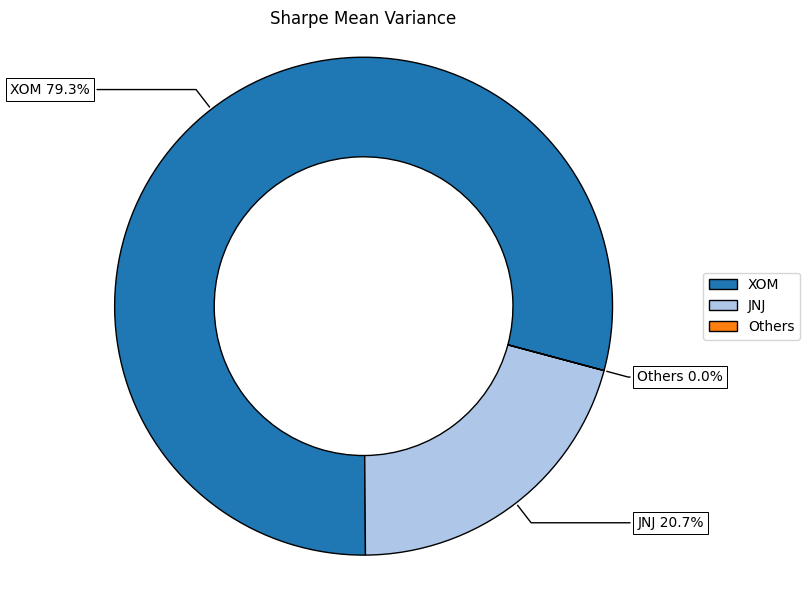

In [87]:
#Plotting the composition of the portfolio
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap='tab20')